# 1 - Classify Handwritten Numbers with QMNIST

## Introduction
When starting out with machine learning, and espesially computer vision, the MNIST dataset has been a longstanding benchmark for algorithms designed to recognize handwritten digits. Building upon this foundation, the QMNIST dataset offers a more robust, extension of the original MNIST dataset by providing 50,000 more testing images.

### Understainging the QMNIST Dataset
The QMNSIT dataset includes 60,000 training images and 60,000 testing images, each of size 28x28 pixels, labeled with corresponding digits from 0 to 9. Below you you can see some of the setup code for loading my datamodule and plotting some of the training images.

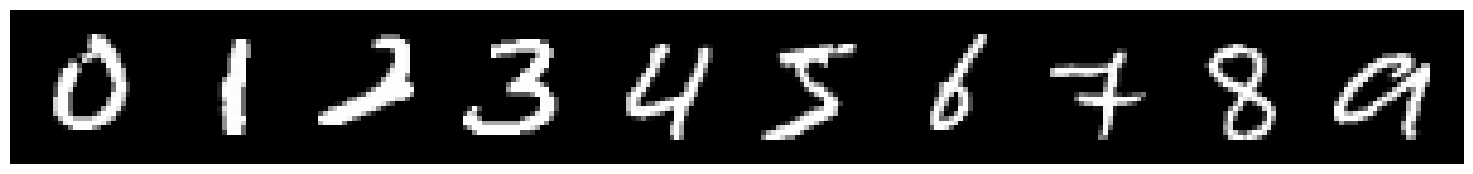

In [2]:
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
from ml_zoo import MNISTDataModuleConfig, MNISTDataModule

# Create DataModule
dm_config = MNISTDataModuleConfig(
    data_dir="data",
    batch_size=64,
    num_workers=4,
    pin_memory=True,
    persistent_workers=True,
    transforms=transforms.Compose([transforms.ToTensor()]),
    use_qmnist=True,
)

dm = MNISTDataModule(dm_config)
dm.prepare_data()
dm.setup()
train_loader = dm.train_dataloader()
val_loader = dm.val_dataloader()
test_loader = dm.test_dataloader() # Same as val_loader

# Plot images 0-9
plt.figure(figsize=(20, 2))
imgs = []
for i in range(10):
    for x, y in train_loader:
        if y[0] == i:
            imgs.append(x[0])
            break
plt.imshow(torchvision.utils.make_grid(imgs, nrow=10).permute(1, 2, 0))
plt.axis("off")
plt.show()

The dataset contains mostly an even distribution of images per label.

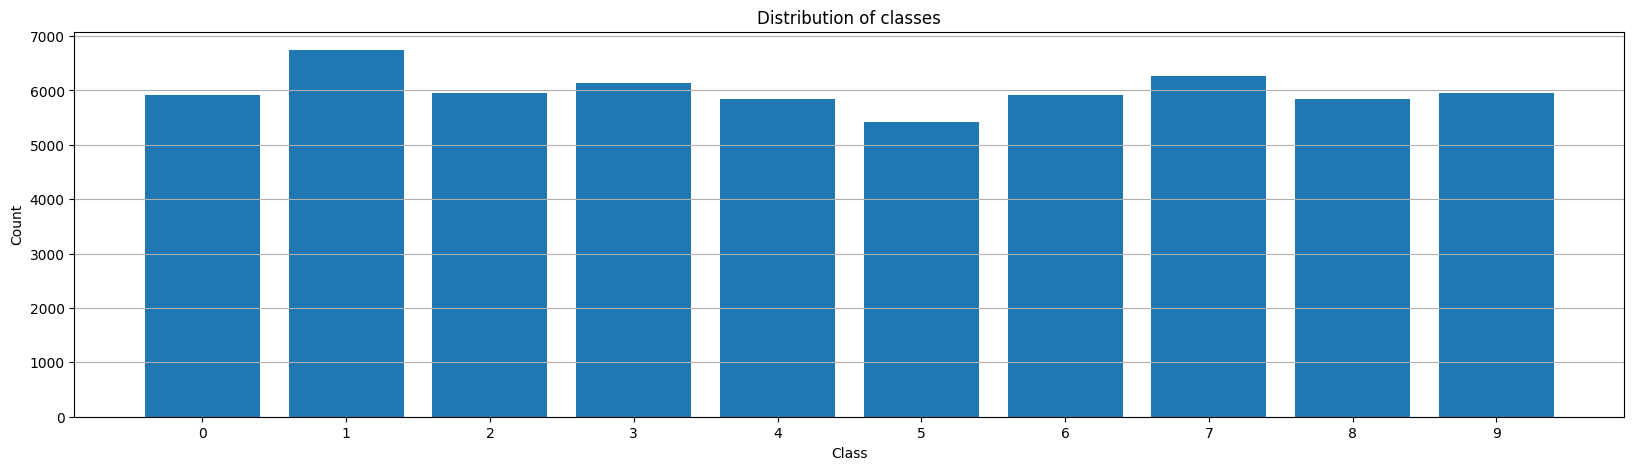

In [3]:
plt.figure(figsize=(20, 5))

# Plot distribution of classes
values = {k: 0 for k in range(10)}
for x, y in train_loader:
    for yi in y:
        values[yi.item()] += 1

plt.bar(values.keys(), values.values())
plt.grid(axis="y")
plt.xlabel("Class")
plt.xticks(range(10))
plt.ylabel("Count")
plt.title("Distribution of classes")
plt.show()

### How are we going to classify these?
From the previous post, based off the understanding that neural networks can learn non-linear relationships in data, we can treat each pixel in a generic 28x28 grid to contain a plot of the corresponding pixel value across all of the dataset

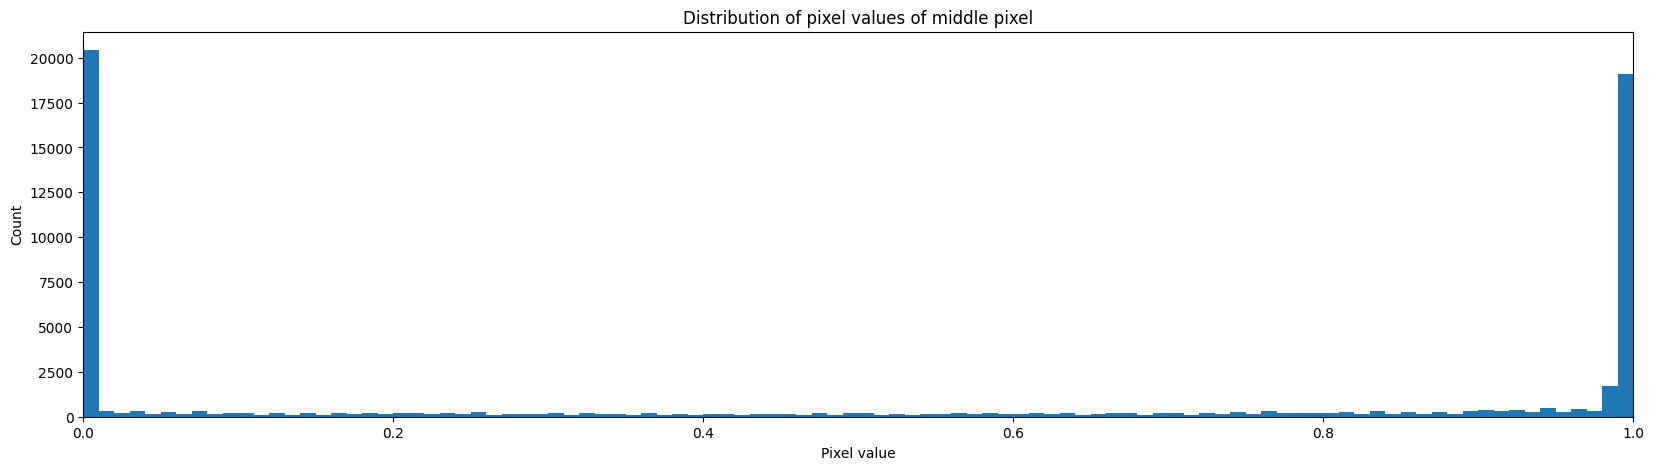

In [4]:
# Plot distribution of pixel values of middle pixel
values = []
for x, y in train_loader:
    values.extend(x[:, :, 28//2, 28//2].flatten().tolist())

plt.figure(figsize=(20, 5))
plt.hist(values, bins=100)
plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.xlim(0, 1)
plt.title("Distribution of pixel values of middle pixel")
plt.show()


Looks pretty arbrtirary, to us humans, but a neural netowork is able to find patterns that will correspond to a specific class. Lets see how well we can do with a simple neural network.

### Lets Train a Neural Network